# Lab 1: Image enhancement
## Introduction
In this first lab, we will introduce some of the conventional methods using for image enhancement. The goal at this stage is to improve the quality of the image so that the relevant features can be extracted easily. We will start with 1D signals for simplicity and move to 2D images later. We will mostly focus on the practical aspect while the theory behind each algorithm is presented in greater depth in some of the books and papers attached.\
Interesting tutorials can be found in the OpenCV website : https://docs.opencv.org/4.x/d2/d96/tutorial_py_table_of_contents_imgproc.html

In [360]:
import numpy as np
import matplotlib.pyplot as plt
import cv2

## I) 1D image filtering
In this example, we will start with a 1D signal of a variable of progress of reaction $c$ across a laminar unstretched freely-propagating flat flame obtained from simulations of a stoichiometric ($\Phi = 1$) methane/air flame. In this example, the variable of progress is defined from temperatures $T$
\begin{align}
c(x) = \frac{T(x) - T_u}{T_b-T_u}
\end{align}
where $x$ is the coordinate normal to the flame front and subscripts $<.>_u$ and $<.>_b$ refer to unburnt and burnt respectively. 

We will start by importing the attached file "simulation.py" containing the pre-computed simulation data. This can be used to compute the variable of progress. The 1D profile of heat release rate ($\text{HRR}$) can also be defined to locate the position of the flame front $x_f$. A common definition is : 
\begin{align}
x_f = \arg \max_x\,\text{HRR}(x)
\end{align}
In other words, the position of the flame front can be taken as the location of peak heat release rate across the flame. This separates the flame front into two regions: a reactant and a product region.

In [361]:
import simulation_data as sd

In [362]:
c = (sd.T-sd.T[0])/(sd.T[-1]-sd.T[0])
x_f = x[np.argmax(HRR)]/np.max(x)

We can then plot the obtained variable of progress and the heat release rate across the normal coordinate provided. For visibility, we will normalize both the $\text{HRR}$ and the spatial coordinate by their respective maxima.

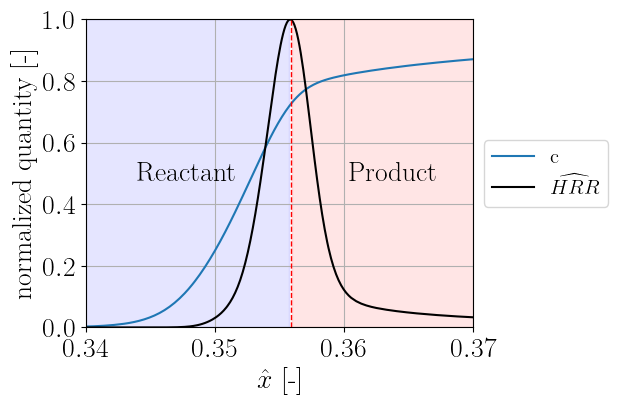

The flame front is located at normalized normal coordinate hat(x)  = 0.356 [-] of the origin.
The flame front is located at normal coordinate x  = 0.014 [m] of the origin.
This location corresponds to a variable of progress c  = 0.72 [-].


In [363]:
fig = plt.figure(figsize=(5, 4), dpi = 100)
plt.plot(x/np.max(x),c,label = "c")
plt.plot(x/np.max(x),HRR/np.max(HRR), label = r"$\widehat{HRR}$", color = 'k')
plt.grid(True)
plt.xlabel("$\hat{x}$ [-]")
plt.ylabel("normalized quantity [-]")
plt.ylim(0,1)
plt.xlim(0.34,.37)
plt.legend(loc='center left',fontsize = "15",bbox_to_anchor=(1, 0.5))
plt.axvline(x=x_f,color = 'r', linestyle = '--', linewidth = 1)
# Highlight regions
plt.fill_between(x/np.max(x), 0, 1, where=(x/np.max(x) > x_f), color='red', alpha=0.1)
plt.fill_between(x/np.max(x), 0, 1, where=(x/np.max(x) < x_f), color='blue', alpha=0.1)
plt.text(x_f - .008, 0.5, 'Reactant', color='k', ha = 'center', va = 'center')
plt.text(x_f + .008, 0.5, 'Product', color='k', ha = 'center', va = 'center')
# LaTeX rendering
plt.rcParams['text.usetex'] = True
plt.rcParams['text.latex.preamble'] = r'\usepackage{amsmath}'
plt.rcParams['mathtext.fontset'] = 'stix'
plt.rcParams.update({'font.size': 20})
# Show the plot
plt.show()

# Printing the location of the flame front
print(f'The flame front is located at normalized normal coordinate hat(x)  = {x[np.argmax(HRR)]/np.max(x):.3} [-] of the origin.')
print(f'The flame front is located at normal coordinate x  = {x[np.argmax(HRR)]:.2} [m] of the origin.')
print(f'This location corresponds to a variable of progress c  = {c[np.argmax(HRR)]:.2} [-].')

In real applications, signals are typically polluted by high-frequency noise which stems from the data acquisition process (laser beam inhomogeneities, fluctuations in laser beam energy, camera intensifiers, etc.) To obtain a more realistic signal, we can add synthetic gaussian noise to the data. It is important to note, however, that not all the noise encountered in experimental data can be modelled as Gaussian though this can often be a reasonable assumption.\
Moreover, noise is often more intense on the burnt side ($c\geq 0.5$) than on the unburnt but we will consider it constant throughout the whole domain for simplicity.

We will sample random Gaussian noise of a given mean $\mu_{noise}$ and standard deviation $\sigma_{noise}$, then add it to the original image.

In [364]:
mu_noise = .1;
sigma_noise = mu_noise/3;
noise = np.random.normal(loc = mu_noise, scale = sigma_noise, size = len(x))

In [365]:
c_noisy = c+noise;
c_noisy = c_noisy + (1-max(c_noisy))
c_noisy = c_noisy + min(c_noisy)

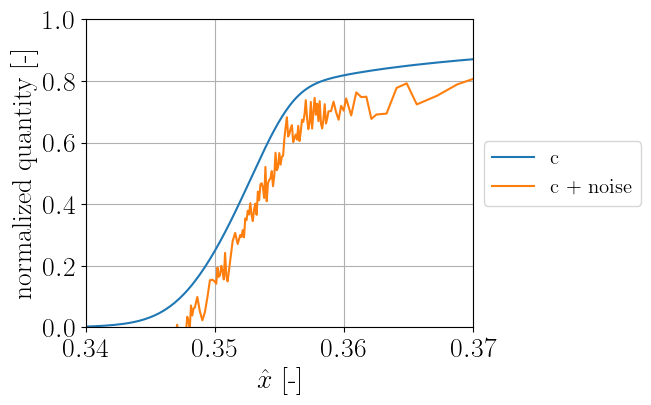

In [366]:
fig = plt.figure(figsize=(5, 4), dpi = 100)
plt.plot(x/np.max(x),c,label = "c")
plt.plot(x/np.max(x),c_noisy,label = "c + noise")
plt.grid(True)
plt.xlabel("$\hat{x}$ [-]")
plt.ylabel("normalized quantity [-]")
plt.ylim(0,1)
plt.xlim(0.34,.37)
plt.legend(loc='center left',fontsize = "15",bbox_to_anchor=(1, 0.5))
# LaTeX rendering
plt.rcParams['text.usetex'] = True
plt.rcParams['text.latex.preamble'] = r'\usepackage{amsmath}'
plt.rcParams['mathtext.fontset'] = 'stix'
plt.rcParams.update({'font.size': 20})
# Show the plot
plt.show()